In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score


In [5]:
import pandas as pd

# Load the CSV file
file_path = r"D:\Data since couress\Clustering\EastWestAirlines.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Load the data sheet
df = pd.read_csv(csv, sheet_name="data")

# Display basic information
print(df.info())
df.head()


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


NameError: name 'csv' is not defined

In [17]:
import pandas as pd

# Correct file path (use double backslashes `\\` OR raw string `r""`)
file_path = r"D:\Data since couress\Clustering\EastWestAirlines.csv"

# Read CSV file correctly
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [19]:
# Drop the ID column (not useful for clustering)
df_clean = df.drop(columns=['ID#'])

# Scale the numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

# Display first few rows
df_scaled.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


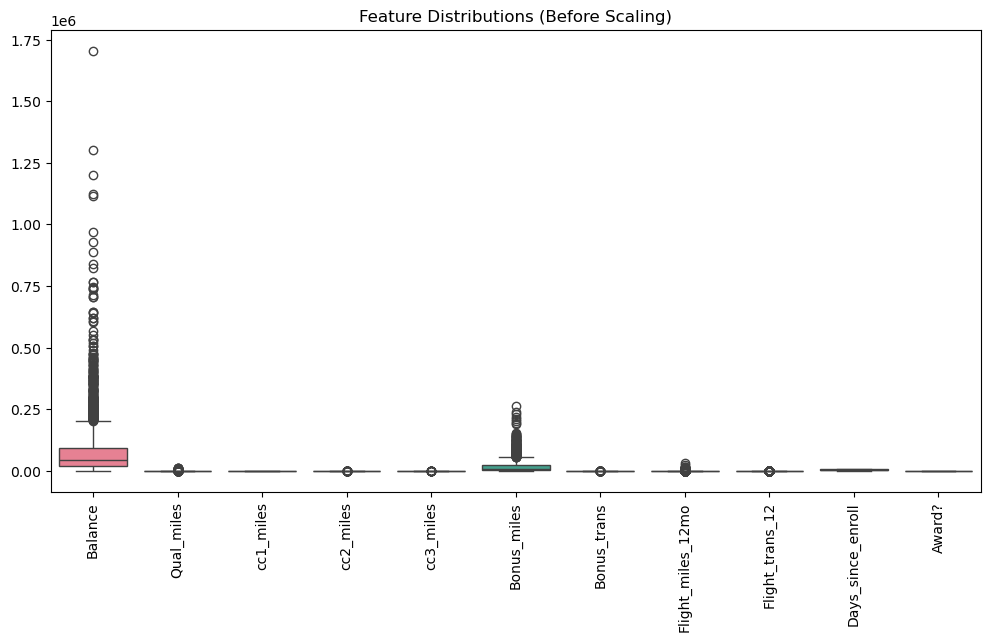

In [21]:
# Visualizing distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean)
plt.xticks(rotation=90)
plt.title("Feature Distributions (Before Scaling)")
plt.show()


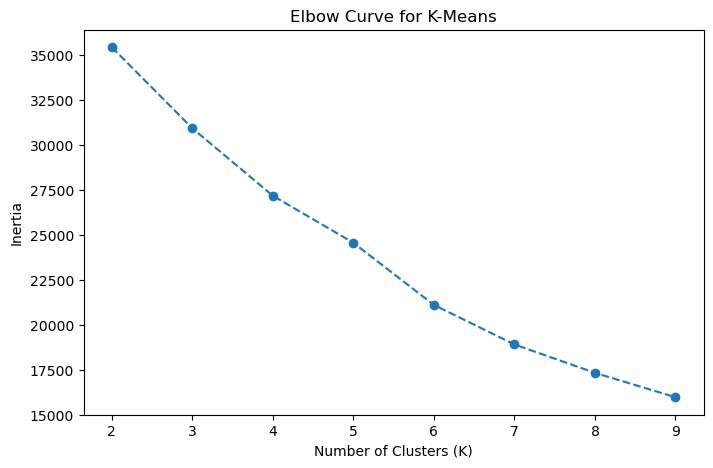

Silhouette Score for K-Means: 0.309


In [23]:
# Find optimal number of clusters using Elbow Method
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for K-Means")
plt.show()

# Apply K-Means with optimal K (let's assume 4 from Elbow Method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clean["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)

# Silhouette Score
silhouette_kmeans = silhouette_score(df_scaled, df_clean["KMeans_Cluster"])
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.3f}")


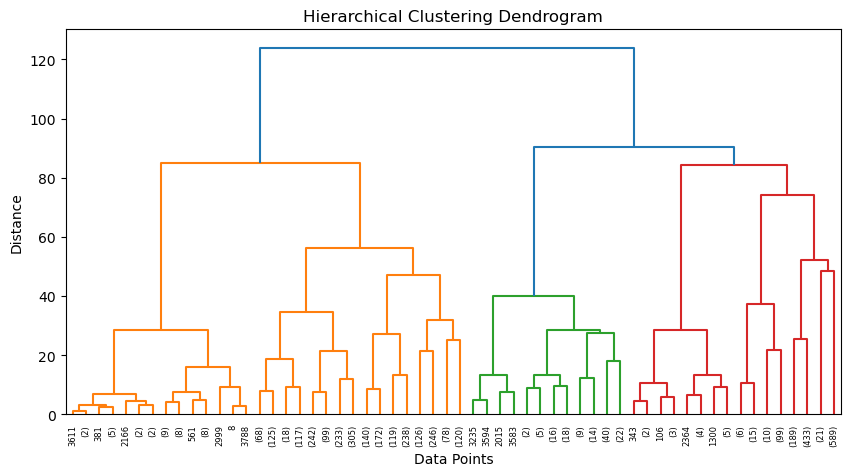

Silhouette Score for Hierarchical Clustering: 0.308


In [25]:
# Create linkage matrix
linkage_matrix = linkage(df_scaled, method="ward")

# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering (Assuming 4 clusters)
df_clean["Hierarchical_Cluster"] = fcluster(linkage_matrix, optimal_k, criterion="maxclust")

# Silhouette Score
silhouette_hierarchical = silhouette_score(df_scaled, df_clean["Hierarchical_Cluster"])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.3f}")


In [27]:
# Apply DBSCAN (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=1.5, min_samples=5)
df_clean["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)

# Count unique clusters (including noise as -1)
print(df_clean["DBSCAN_Cluster"].value_counts())

# Silhouette Score (excluding noise points)
valid_clusters = df_clean[df_clean["DBSCAN_Cluster"] != -1]["DBSCAN_Cluster"]
if len(valid_clusters) > 1:
    silhouette_dbscan = silhouette_score(df_scaled[df_clean["DBSCAN_Cluster"] != -1], valid_clusters)
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.3f}")
else:
    print("DBSCAN did not form enough clusters to compute Silhouette Score.")


DBSCAN_Cluster
 0    2411
 1    1250
-1     310
 2      15
 3       8
 4       5
Name: count, dtype: int64
Silhouette Score for DBSCAN: 0.294


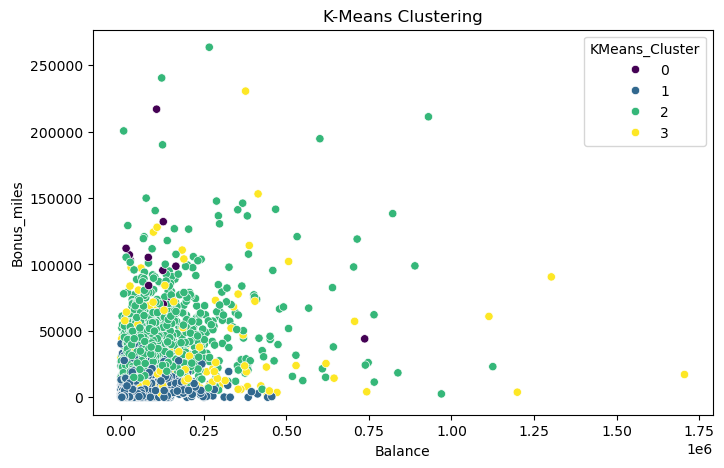

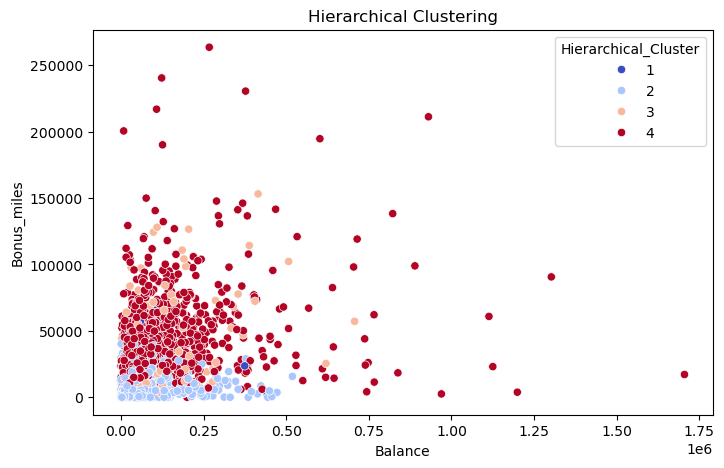

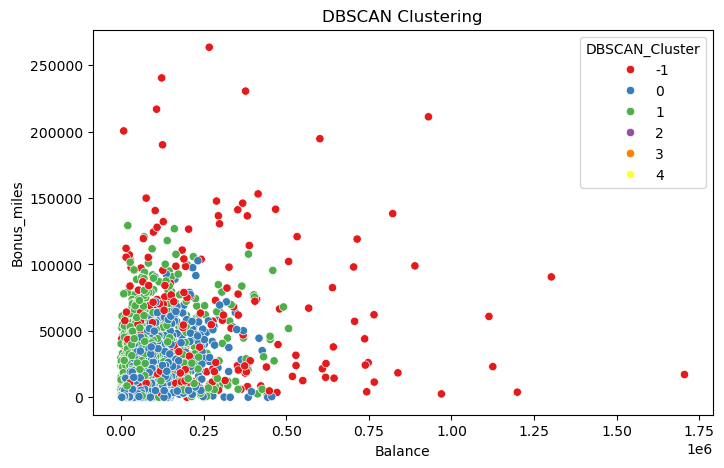

In [29]:
# Scatter plot of K-Means Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_clean["Balance"], y=df_clean["Bonus_miles"], hue=df_clean["KMeans_Cluster"], palette="viridis")
plt.title("K-Means Clustering")
plt.show()

# Scatter plot of Hierarchical Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_clean["Balance"], y=df_clean["Bonus_miles"], hue=df_clean["Hierarchical_Cluster"], palette="coolwarm")
plt.title("Hierarchical Clustering")
plt.show()

# Scatter plot of DBSCAN Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_clean["Balance"], y=df_clean["Bonus_miles"], hue=df_clean["DBSCAN_Cluster"], palette="Set1")
plt.title("DBSCAN Clustering")
plt.show()
